# EUV

In [ ]:
import os
import drms
from datetime import datetime

In [ ]:
jsoc_email = 'mgjeon@khu.ac.kr'
client = drms.Client(email=jsoc_email, verbose=True)

In [ ]:
year = 2017
month = 9
day = 6
hour = 8
minute = 36

start_time = datetime(year, month, day, hour, minute)
start_time

datetime.datetime(2017, 9, 6, 8, 36)

In [ ]:
noaa_nums = [12673]

ar_mapping = client.query('hmi.Mharp_720s[][%sZ]' % start_time.isoformat('_', timespec='seconds'),
                           key=['NOAA_AR', 'HARPNUM'])
ar_mapping

,NOAA_AR,HARPNUM
0,12673,7115
1,12674,7117
2,0,7118
3,12677,7122
4,12675,7123
5,0,7125
6,12678,7127
7,0,7128
8,0,7129


In [ ]:
nums = []

if len(ar_mapping) !=0:
    for noaa_num in noaa_nums:
        harpnum = ar_mapping[ar_mapping['NOAA_AR'] == int(noaa_num)]['HARPNUM']
        if len(harpnum) > 0:
            num_dict = {'NOAA_AR':noaa_num, 'HARPNUM':harpnum.iloc[0]}
            nums.append(num_dict)

nums

[{'NOAA_AR': 12673, 'HARPNUM': 7115}]

In [ ]:
pick_num = nums[0]
pick_num

{'NOAA_AR': 12673, 'HARPNUM': 7115}

In [ ]:
download_dir = f"NOAA_{pick_num['NOAA_AR']}"
os.makedirs(download_dir, exist_ok=True)
download_dir

'NOAA_12673'

In [ ]:
ds = 'hmi.%s[%d][%s]{Br, Bp, Bt}' % (
     'sharp_cea_720s', pick_num['HARPNUM'], start_time.isoformat('_', timespec='seconds'))
ds

'hmi.sharp_cea_720s[7115][2017-09-06_08:36:00]{Br, Bp, Bt}'

In [ ]:
client.info(ds)

<ExportRequest: id=None, status=7>

In [ ]:
r = client.export(ds, protocol='fits')
r.wait()
download_result = r.download(download_dir)
download_result

DrmsExportError: User mgjeon@khu.ac.kr has 1 pending export requests (JSOC_20230709_744); please wait until at least one request has completed before submitting a new one. [status=7]

DrmsExportError: User mgjeon@khu.ac.kr has 1 pending export requests (JSOC_20230709_744); please wait until at least one request has completed before submitting a new one. [status=7]

In [ ]:
r = client.export_from_id('JSOC_20230709_744')
r.download('./')

Export request pending. [id=JSOC_20230709_744, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230709_744, status=1]
Waiting for 5 seconds...


KeyboardInterrupt: 

In [ ]:
r = client.export_from_id('JSOC_20230709_744')
r.wait()
download_result = r.download(download_dir)
download_result

Export request pending. [id=JSOC_20230709_744, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230709_744, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230709_744, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230709_744, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230709_744, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230709_744, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230709_744, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230709_744, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230709_744, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230709_744, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230709_744, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230709_744, status=1]
Waiting for 5 seconds...
Export request p

KeyboardInterrupt: 

## Import

In [ ]:
from sunpy.map import Map
import matplotlib.pyplot as plt

## HMI

In [ ]:
hmi_r_path = '/home/tensor/workspace/GPUserver/workspace/NF2/example/AR_7115/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Br.fits'

In [ ]:
def hmi_r(hmi_r_path):
    hmi_r_map = Map(hmi_r_path)
    hmi_r_map.peek()

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]
See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


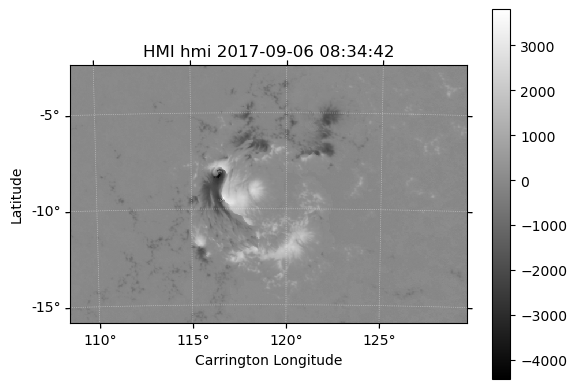

In [ ]:
hmi_r(hmi_r_path)

In [ ]:
ref_wcs = hmi_r_map.wcs
ref_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'CRLN-CEA'  'CRLT-CEA'  
CRVAL : 119.071274  -9.24354935  
CRPIX : 344.5  224.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.0299999993  0.0299999993  
NAXIS : 688  448

## AIA 94

In [ ]:
aia_94_path = '/home/tensor/workspace/GPUserver/workspace/NF2/example/AR_7115/aia.lev1_euv_12s.2017-09-06T085701Z.94.image_lev1.fits'

In [ ]:
def aia_94(aia_94_path, ref_wcs):
    aia_94_map = Map(aia_94_path)
    aia_94_map.peek()
    obstime = aia_94_map.observer_coordinate.obstime
    obstime.format = 'iso'
    aia_94_repro_map = aia_94_map.reproject_to(ref_wcs)

    fig = plt.figure()
    ax = fig.add_subplot(projection=aia_94_repro_map)
    aia_94_repro_map.plot(axes=ax)
    plt.colorbar()
    plt.title(f"AIA 94 Å {obstime.value}")
    plt.show()

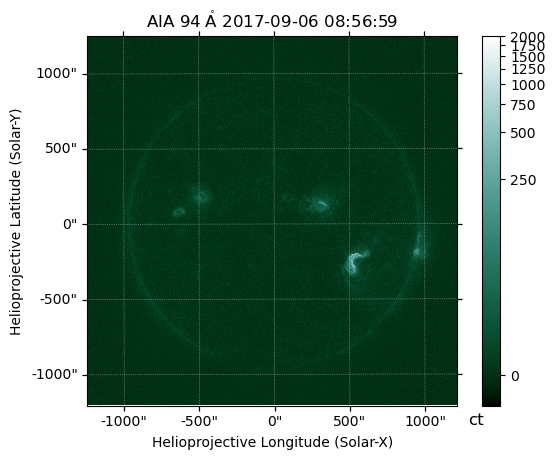

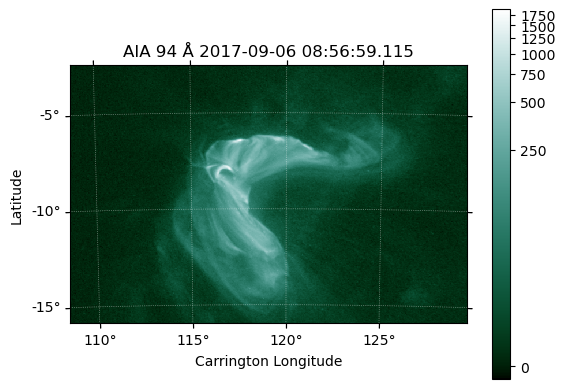

In [ ]:
aia_94(aia_94_path, ref_wcs)